In [2]:
# %load_ext autoreload
import importlib
import pandas as pd
import os
import sys
import pwd
import numpy as np
from pathlib import Path
from tqdm import tqdm, trange
from tqdm.contrib.concurrent import process_map
import matplotlib.pyplot as plt
import GEOparse
import scanpy as sc
from scipy import sparse as sp
import sparse as spa
import scipy as spy
from scipy.stats import linregress, entropy
sys.path.append('../')
from meth import tools as mtools
from meth import analytic_tools as anatools
from meth.meth_anndata import AnnDataSet
from scipy.stats import pearsonr 
from matplotlib import rcParams
%load_ext autoreload
%autoreload 2
plt.style.use('../Stochastic aging/pics/meth.mplstyle')

# Fig 1

## Fig 1e

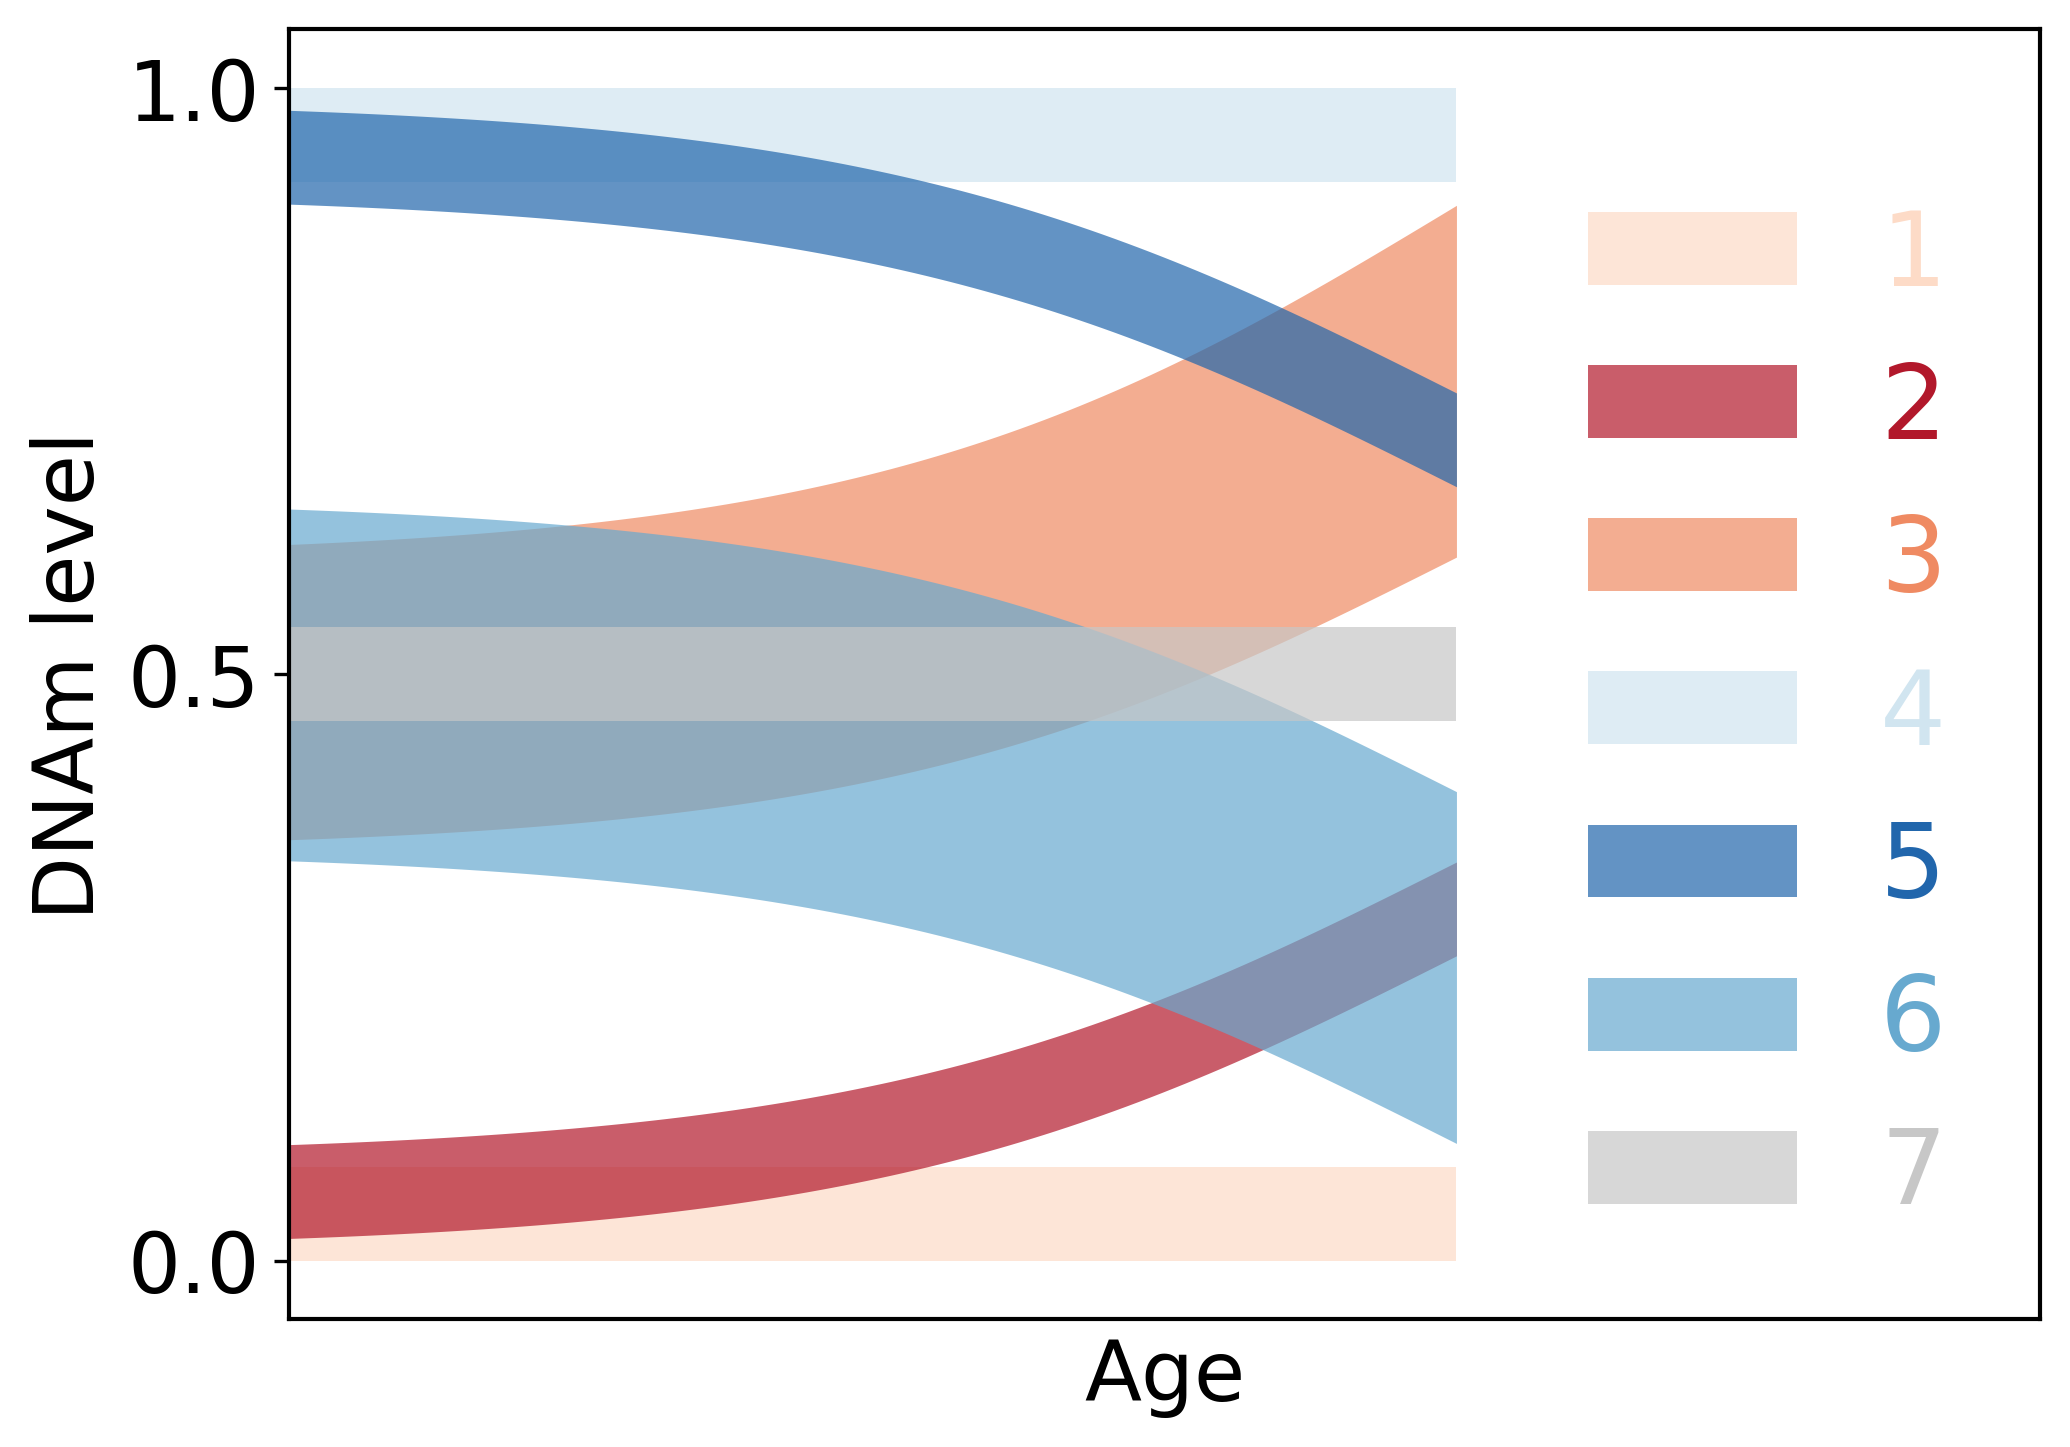

In [82]:
colors7 = np.array(['#b2182b',
'#ef8a62',
'#fddbc7',
'#c7c7c7',#'#f7f7f7',
                    
'#d1e5f0',
'#67a9cf',
'#2166ac'])
colors = colors7[np.array([2,0,1,4,-1,-2,3])]

rcParams['axes.linewidth'] = 1 # set the value globally

plt.figure(dpi=300, figsize=(7,5))
# t_ = np.linspace(0, 1, num=100)
t_ = np.linspace(-1, 0, num=100)
lw = 0
sh = 0.
alpha = 0.7
wd = 0.06
wd2 = 0.15
#1
plt.fill_between(t_, 0* np.tanh(2* (t_-sh)), 0.2 - 2*wd+ 0* np.tanh(2* (t_-sh)), color=colors7[2],#'navy',
         lw=lw,label=1, alpha=alpha)
#2
plt.fill_between(t_, -0.05 + wd+ 0.25*(1. + np.tanh(2* (t_-sh))), -0.05 + 0.2- wd + 0.25*(1. + np.tanh(2* (t_-sh))), color=colors7[0], #'lime', 
                 lw=lw,label=2, alpha=alpha)
#3
plt.fill_between(t_, 0.5 - 0.3 + wd2+ 0.25 * (1. + np.tanh(2* (t_-sh))),  0.5 + 0.25  -wd2 +  0.3 * (1. + np.tanh(2* (t_-sh))), color=colors7[1],#'forestgreen', 
         lw=lw,label=3, alpha=alpha)
#4
plt.fill_between(t_, 1. + 0*np.tanh(2* (t_-sh)), 0.8 + 2*wd+ 0*np.tanh(2* (t_-sh)),color=colors7[4],#'blue',
         lw=lw,label=4, alpha=alpha)
#5
plt.fill_between(t_, 0.35 + wd + 0.25*(1-np.tanh(2* (t_-sh))), 0.55-wd+0.25*(1-np.tanh(2* (t_-sh))),color=colors7[-1],#'red', 
         lw=lw,label=5, alpha=alpha)
#6
plt.fill_between(t_, -0.3 + wd2 +0.25* (1 - np.tanh(2* (t_-sh))), 0.3-wd2+ 0.25* (1 - np.tanh(2* (t_-sh))), color=colors7[-2],
         #'pink', 
         lw=lw,label=6, alpha=alpha)
#7
plt.fill_between(t_, 0.4  +wd + 0*np.tanh(2* (t_-sh)), 0.6 -wd+ 0*np.tanh(2* (t_-sh)),color=colors7[3],#'darkred',
         lw=lw,label=7, alpha=alpha)
# plt.xlim([0,3.7])
plt.xlim([-1,0.5])
plt.xlabel('Age')

# colors = ['navy', 'lime', 'forestgreen', 'blue', 'red', 'pink', 'darkred']
colors = colors7[np.array([2,0,1,4,-1,-2,3])]
numbers = [4,5,7,6,1,2,7,3,4]

l = plt.legend(fontsize=25, loc='lower right',frameon=False)
for i, text in enumerate(l.get_texts()):
    text.set_color(colors[i])
plt.xticks([])
plt.ylabel('DNAm level')
plt.yticks([0, 0.5, 1])
plt.tight_layout()
plt.savefig("PAPER_PICS/Fig1e_new.png", format="png", dpi=300)
plt.show()